In [1]:
import qiskit as qk
from qiskit.circuit.library.standard_gates import RYGate
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
import numpy as np
import itertools


In [3]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

#Permet de récuperer l'image à partir de des données de la X simulation
def countToImage(n,dc,counts):
    rimg =np.zeros(shape=(2**n,2**n))
    for i in counts:
        x = [int(a) for a in str(i)]
        if(x[0] == 0):
            rimg[dc[i[1::]]] -= counts[i]
        else:
            rimg[dc[i[1::]]] += counts[i]
    print(rimg)
    minv= rimg[(0,0)]
    maxv= rimg[(0,0)]
    for i in range(2**n):
        for u in range(2**n):
            if rimg[(i,u)]<minv:
                minv = rimg[(i,u)]
            if rimg[(i,u)]>maxv:
                maxv = rimg[(i,u)]
    print(maxv,minv)
    for i in range(2**n):
        for u in range(2**n):
            rimg[(i,u)] = rescale( rimg[(i,u)],minv,maxv,0,100)
    print(rimg)
    return rimg
    

In [4]:
#Permet d'associer chaque pixel à une permutation de n bit
def perm(n):
    a = ["".join(seq) for seq in itertools.product("01", repeat=2*n)]
    dic = {}
    dic2 = {}
    c = 0
    for i in range(2**n):
        for y in range(2**n):
            dic[(i,y)] = a[c]
            dic2[a[c]] = (i,y)
            c+=1
    return dic,dic2

p1,p2 = perm(1)
print("A",p1)
#print("B",p2)


A {(0, 0): '00', (0, 1): '01', (1, 0): '10', (1, 1): '11'}


In [5]:
#Implément l'itération dans le circuit (porte X) et l'ajout des Rotation y controllées
def Rgate(circuit,perm,cn,theta,f):
    u = 0
    l = []
    perm = perm[::-1]
    for i in perm:
        if i == '1':
            circuit.x(u)
        l.append(u)
        u += 1
    l.append(u)
    c3ry = RYGate(2*theta).control(cn)
    circuit.append(c3ry, l)
    u = 0
    if f == False:
        for i in perm:
            if i == '1':
                circuit.x(u)
            u += 1
    qc.barrier()
    return circuit

In [6]:
#Creation et affichage du circuit pour l'image: '0 0.5 1 0.5; 1 0 1 0 ; 1 0 1 0 ; 1 1 1 1'
image = np.matrix('0 0.5 1 0.5; 1 0 1 0 ; 1 0 1 0 ; 1 1 1 1')
theta = []
for i in range(4):
    for y in range(4):
        if image[i,y] == 1:
            theta.append(pi/2)
        if image[i,y] == 0.5:
            print(pi/4)
            print(i,y)
            print(image[i,y])
            theta.append(pi/4)
        if image[i,y] == 0:
            theta.append(0)

qc = QuantumCircuit(5)           
for i in range(4):
    qc.h(i)

Rgate(qc,"0000",4,theta[0],False)
Rgate(qc,"0001",4,theta[1],False)
Rgate(qc,"0010",4,theta[2],False)
Rgate(qc,"0011",4,theta[3],False)
Rgate(qc,"0100",4,theta[4],False)
Rgate(qc,"0101",4,theta[5],False)
Rgate(qc,"0110",4,theta[6],False)
Rgate(qc,"0111",4,theta[7],False)
Rgate(qc,"1000",4,theta[8],False)
Rgate(qc,"1001",4,theta[9],False)
Rgate(qc,"1010",4,theta[10],False)
Rgate(qc,"1011",4,theta[11],False)
Rgate(qc,"1100",4,theta[12],False)
Rgate(qc,"1101",4,theta[13],False)
Rgate(qc,"1110",4,theta[14],False)
Rgate(qc,"1111",4,theta[15],True)

qc.measure_all()
qc.draw()

0.7853981633974483
0 1
0.5
0.7853981633974483
0 3
0.5


┌───┐          ░ ┌───┐           ┌───┐ ░                     ░ ┌───┐»
   q_0: ┤ H ├────■─────░─┤ X ├─────■─────┤ X ├─░──────────■──────────░─┤ X ├»
        ├───┤    │     ░ └───┘     │     └───┘ ░ ┌───┐    │    ┌───┐ ░ ├───┤»
   q_1: ┤ H ├────■─────░───────────■───────────░─┤ X ├────■────┤ X ├─░─┤ X ├»
        ├───┤    │     ░           │           ░ └───┘    │    └───┘ ░ └───┘»
   q_2: ┤ H ├────■─────░───────────■───────────░──────────■──────────░──────»
        ├───┤    │     ░           │           ░          │          ░      »
   q_3: ┤ H ├────■─────░───────────■───────────░──────────■──────────░──────»
        └───┘┌───┴───┐ ░      ┌────┴────┐      ░      ┌───┴───┐      ░      »
   q_4: ─────┤ Ry(0) ├─░──────┤ Ry(π/2) ├──────░──────┤ Ry(π) ├──────░──────»
             └───────┘ ░      └─────────┘      ░      └───────┘      ░      »
meas: 5/════════════════════════════════════════════════════════════════════»
                                                                            »
«                   ┌───┐ ░                     ░ ┌───┐         ┌───┐ ░      »
«   q_0: ─────■─────┤ X ├─░──────────■──────────░─┤ X ├────■────┤ X ├─░──────»
«             │     ├───┤ ░          │          ░ └───┘    │    └───┘ ░ ┌───┐»
«   q_1: ─────■─────┤ X ├─░──────────■──────────░──────────■──────────░─┤ X ├»
«             │     └───┘ ░ ┌───┐    │    ┌───┐ ░ ┌───┐    │    ┌───┐ ░ ├───┤»
«   q_2: ─────■───────────░─┤ X ├────■────┤ X ├─░─┤ X ├────■────┤ X ├─░─┤ X ├»
«             │           ░ └───┘    │    └───┘ ░ └───┘    │    └───┘ ░ └───┘»
«   q_3: ─────■───────────░──────────■──────────░──────────■──────────░──────»
«        ┌────┴────┐      ░      ┌───┴───┐      ░      ┌───┴───┐      ░      »
«   q_4: ┤ Ry(π/2) ├──────░──────┤ Ry(π) ├──────░──────┤ Ry(0) ├──────░──────»
«        └─────────┘      ░      └───────┘      ░      └───────┘      ░      »
«meas: 5/════════════════════════════════════════════════════════════════════»
«                                                                            »
«                       ░ ┌───┐         ┌───┐ ░                     ░ ┌───┐»
«   q_0: ────■──────────░─┤ X ├────■────┤ X ├─░──────────■──────────░─┤ X ├»
«            │    ┌───┐ ░ ├───┤    │    ├───┤ ░          │          ░ └───┘»
«   q_1: ────■────┤ X ├─░─┤ X ├────■────┤ X ├─░──────────■──────────░──────»
«            │    ├───┤ ░ ├───┤    │    ├───┤ ░          │          ░      »
«   q_2: ────■────┤ X ├─░─┤ X ├────■────┤ X ├─░──────────■──────────░──────»
«            │    └───┘ ░ └───┘    │    └───┘ ░ ┌───┐    │    ┌───┐ ░ ┌───┐»
«   q_3: ────■──────────░──────────■──────────░─┤ X ├────■────┤ X ├─░─┤ X ├»
«        ┌───┴───┐      ░      ┌───┴───┐      ░ └───┘┌───┴───┐└───┘ ░ └───┘»
«   q_4: ┤ Ry(π) ├──────░──────┤ Ry(0) ├──────░──────┤ Ry(π) ├──────░──────»
«        └───────┘      ░      └───────┘      ░      └───────┘      ░      »
«meas: 5/══════════════════════════════════════════════════════════════════»
«                                                                          »
«                 ┌───┐ ░                     ░ ┌───┐         ┌───┐ ░      »
«   q_0: ────■────┤ X ├─░──────────■──────────░─┤ X ├────■────┤ X ├─░──────»
«            │    └───┘ ░ ┌───┐    │    ┌───┐ ░ ├───┤    │    ├───┤ ░      »
«   q_1: ────■──────────░─┤ X ├────■────┤ X ├─░─┤ X ├────■────┤ X ├─░──────»
«            │          ░ └───┘    │    └───┘ ░ └───┘    │    └───┘ ░ ┌───┐»
«   q_2: ────■──────────░──────────■──────────░──────────■──────────░─┤ X ├»
«            │    ┌───┐ ░ ┌───┐    │    ┌───┐ ░ ┌───┐    │    ┌───┐ ░ ├───┤»
«   q_3: ────■────┤ X ├─░─┤ X ├────■────┤ X ├─░─┤ X ├────■────┤ X ├─░─┤ X ├»
«        ┌───┴───┐└───┘ ░ └───┘┌───┴───┐└───┘ ░ └───┘┌───┴───┐└───┘ ░ └───┘»
«   q_4: ┤ Ry(0) ├──────░──────┤ Ry(π) ├──────░──────┤ Ry(0) ├──────░──────»
«        └───────┘      ░      └───────┘      ░      └───────┘      ░      »
«meas: 5/══════════════════════════════════════════════════════════════════»
«                                         

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


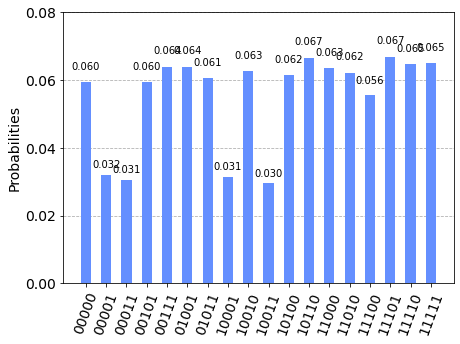

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [21]:
counts

{'01100': 121,
 '00000': 231,
 '10010': 261,
 '10101': 242,
 '10001': 269,
 '01000': 139,
 '01110': 264,
 '01010': 223,
 '11100': 110,
 '10111': 263,
 '11011': 253,
 '01001': 279,
 '11111': 248,
 '10110': 250,
 '11000': 129,
 '10100': 299,
 '10011': 260,
 '01101': 255}

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')


def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    


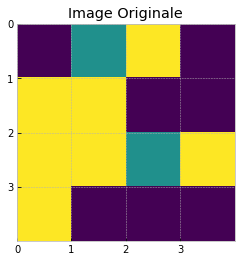

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


[[-6231.    21.  6441. -6288.]
 [ 6265.  6116. -6225. -6070.]
 [ 6356.  6351.  -106.  6382.]
 [ 6168. -6151. -6325. -6212.]]
6441.0 -6325.0
[[  0.73633088  49.71016763 100.           0.28983237]
 [ 98.62133793  97.45417515   0.78333072   1.99749334]
 [ 99.33416889  99.29500235  48.71533762  99.53783487]
 [ 97.86150713   1.36299546   0.           0.88516372]]


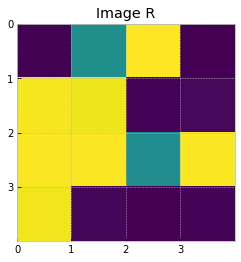

In [11]:
###Décode l'image et crée le circuit correspondant
def PrepCircuit(n,image1):
    image = rescale(image1,0,1,0,pi/2)
    coTop,pToco = perm(n)
    poTov = {}
    for x in range(2**n):
        for y in range(2**n):
            poTov[coTop[x,y]] = image[x,y]

    ###Création du circuit       

    qc = QuantumCircuit(2*n + 1)
    ### Hadamar sur 2n premier qubit
    for i in range(2*n):
        qc.h(i)     
    ### On ajout les porte X et on applique ensuite les Rotations y controllées pour chaque pixels
    taille = len(poTov)
    cu = 1
    for i in poTov:
        if cu == taille:
            Rgate(qc,i,2*n,poTov[i],True)
        else:
            Rgate(qc,i,2*n,poTov[i],False)
        cu+=1

    qc.measure_all()
    return qc,pToco

###Simule it fois le circuit
def measure(qc,it):
    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=it)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts(qc)
    return counts

###Recréer l'image à partir des données de la simulations
def imgRetrieve(count,n,pT):
    ri = countToImage(n,pT,count)
    plot_image(ri, 'Image R')
    
image1 = np.matrix('0 0.5 1 0; 1 1 0 0; 1 1 0.5 1;1 0 0 0')
plot_image(image1, 'Image Originale')

cir, encode = PrepCircuit(2,image1)
c = measure(cir,100000)
imgRetrieve(c,2,encode)
    

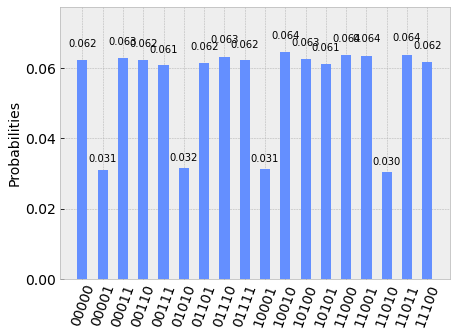

In [12]:
plot_histogram(c)

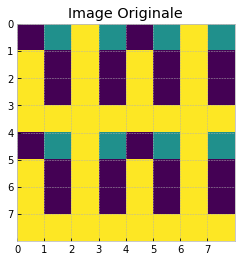

[[-15777.    192.  15564.    -21. -15609.    217.  15755.    -21.]
 [ 15878. -15763.  15430. -15868.  15550. -15344.  15485. -15489.]
 [ 15621. -15469.  15573. -15686.  15552. -15553.  15723. -15701.]
 [ 15450.  15564.  15598.  15515.  15739.  15803.  15737.  15518.]
 [-15602.    -43.  15558.    -73. -15731.    -90.  15809.     89.]
 [ 15722. -15612.  15554. -15755.  15648. -15474.  15575. -15583.]
 [ 15707. -15715.  15708. -15339.  15517. -15822.  15547. -15571.]
 [ 15626.  15642.  15723.  15723.  15668.  15679.  15662.  15668.]]
15878.0 -15868.0
[[  0.28665029  50.58905059  99.01089901  49.91809992   0.81585082
   50.66780067  99.61254961  49.91809992]
 [100.           0.33075033  98.58879859   0.          98.96679897
    1.65060165  98.76204876   1.19385119]
 [ 99.19044919   1.25685126  99.03924904   0.57330057  98.97309897
    0.99225099  99.51174951   0.52605053]
 [ 98.65179865  99.01089901  99.11799912  98.85654886  99.56214956
   99.76374976  99.55584956  98.86599887]
 [  0.8379

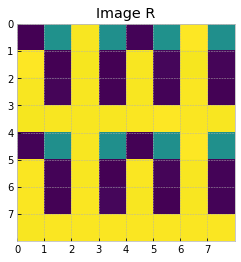

In [13]:
image1 = np.matrix('0 0.5 1 0.5 0 0.5 1 0.5; 1 0 1 0  1 0 1 0 ; 1 0 1 0  1 0 1 0 ; 1 1 1 1 1 1 1 1; 0 0.5 1 0.5 0 0.5 1 0.5; 1 0 1 0  1 0 1 0 ; 1 0 1 0  1 0 1 0 ; 1 1 1 1 1 1 1 1')
plot_image(image1, 'Image Originale')

cir, encode = PrepCircuit(3,image1)
c = measure(cir,1000000)
imgRetrieve(c,3,encode)

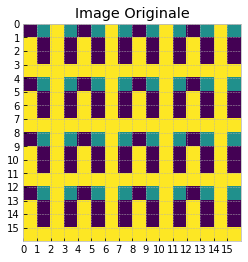

[[-3.914e+03 -6.900e+01  3.996e+03 -1.600e+01 -3.833e+03  8.800e+01
   3.889e+03  2.000e+01 -3.909e+03  3.800e+01  3.954e+03 -1.700e+01
  -3.995e+03 -1.020e+02  3.875e+03 -2.600e+01]
 [ 3.850e+03 -4.003e+03  3.960e+03 -3.996e+03  3.924e+03 -3.959e+03
   3.889e+03 -3.847e+03  3.912e+03 -3.918e+03  3.883e+03 -3.836e+03
   3.929e+03 -3.896e+03  3.849e+03 -3.885e+03]
 [ 3.880e+03 -4.001e+03  3.924e+03 -3.796e+03  3.842e+03 -3.960e+03
   3.928e+03 -3.897e+03  4.011e+03 -3.942e+03  3.986e+03 -3.965e+03
   3.970e+03 -3.916e+03  3.802e+03 -3.930e+03]
 [ 3.915e+03  4.011e+03  3.956e+03  3.985e+03  3.887e+03  3.922e+03
   3.893e+03  3.946e+03  3.891e+03  3.891e+03  3.947e+03  3.844e+03
   3.875e+03  3.784e+03  3.872e+03  3.885e+03]
 [-3.917e+03 -1.800e+01  3.924e+03 -2.000e+01 -3.788e+03 -4.000e+01
   3.894e+03  2.200e+01 -3.837e+03  6.000e+00  3.848e+03  8.000e+00
  -3.909e+03  8.300e+01  3.933e+03 -1.340e+02]
 [ 3.933e+03 -3.803e+03  3.858e+03 -3.938e+03  3.964e+03 -3.934e+03
   3.864e+03 -3.9

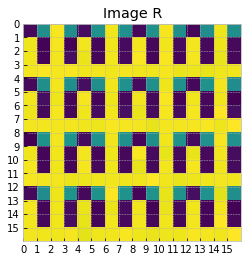

In [14]:
image1 = np.matrix('0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1; 0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1;0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1; 0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5 0 0.5 1 0.5; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 0 1 0  1 0 1 0 1 0 1 0  1 0 1 0 ; 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1')
plot_image(image1, 'Image Originale')

cir, encode = PrepCircuit(4,image1)
c = measure(cir,1000000)
imgRetrieve(c,4,encode)

In [15]:
from PIL import Image

def importImg(file):
    style.use('default')
    image_size = 16       # Original image-width
    image_crop_size = 16   # Width of each part of image for processing

    # Load the image from filesystem
    image_raw = np.array(Image.open(file))
    print('Raw Image info:', image_raw.shape)
    print('Raw Image datatype:', image_raw.dtype)

    # Convert the RBG component of the image to B&W image, as a numpy (uint8) array
    image = []
    for i in range(image_size):
        image.append([])
        for j in range(image_size):
            image[i].append(image_raw[i][j][0] / 255)

    image = np.array(image)
    image = image*100
    return image


Raw Image info: (16, 16, 4)
Raw Image datatype: uint8


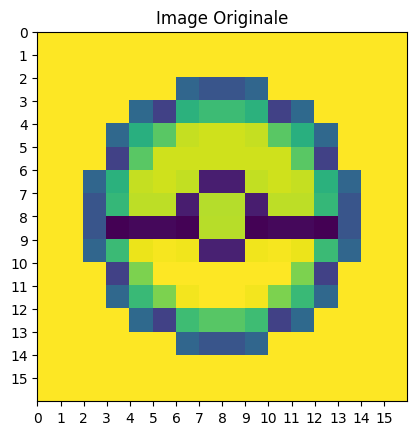

/Users/alexandreconstantin/opt/anaconda3/envs/ENV_NAME/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


[[ 3868.  4016.  3958.  3827.  3839.  4001.  3891.  3748.  3946.  3893.
   3954.  3916.  3903.  3770.  3911.  3896.]
 [ 3954.  4047.  3864.  3856.  3794.  4030.  4006.  3804.  3955.  3957.
   4003.  3791.  3841.  4047.  3876.  3870.]
 [ 4062.  3881.  3935.  3894.  3933.  3966. -1525. -2213. -2118. -1620.
   3900.  3899.  3936.  3927.  3943.  3869.]
 [ 3880.  3902.  3866.  3936. -1387. -2808.  2060.  2443.  2331.  1922.
  -2782. -1384.  3934.  4048.  3931.  3883.]
 [ 4000.  3820.  3921. -1357.  1774.  2805.  3858.  3812.  3876.  3736.
   3064.  1883. -1492.  3896.  3873.  4054.]
 [ 3941.  3951.  4075. -2746.  2824.  3766.  3875.  3722.  3787.  3788.
   3893.  2927. -2762.  4000.  3842.  3837.]
 [ 3918.  3894. -1454.  1855.  3751.  3756.  3743. -3507. -3559.  3684.
   3848.  3829.  1891. -1434.  3917.  3850.]
 [ 3896.  4073. -2253.  2146.  3867.  3709. -3466.  3743.  3687. -3458.
   3765.  3710.  2181. -2143.  4035.  3835.]
 [ 3950.  3910. -2177. -3699. -3725. -3729. -3729.  3766.  3848.

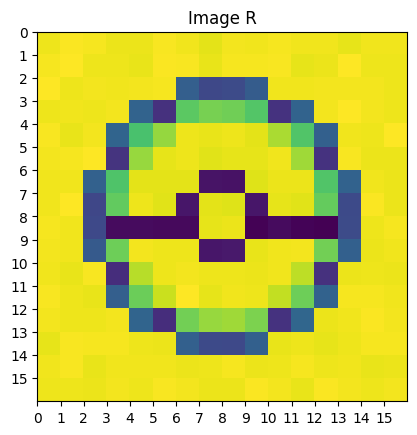

In [16]:
img = importImg("poke16.png")
img /= 100
plot_image(img, 'Image Originale')
cir, encode = PrepCircuit(4,img)
c = measure(cir,1000000)
imgRetrieve(c,4,encode)